# Principal Components Analysis using Singular Value Decomposition

The majority of Machine Learning problems include an enormous amount of features for each sample point. This both drastically increases the training time and makes finding the reasonable solution infeasible (the curse of dimensionality). Thus, we woud love to devise a way of representing the original training set using smaller number of dimensions, which we can do using Singular Value Decomposition.

### Singular Value Decomposition

Eigendecomposition $A = V \Lambda V^{-1}$ is only applicable to square matrices that have enough linearly independent eigenvectors. Even if the matrix is diagonalizable,  $V$ does not always have a nice property of orthogonality (it does so only if $A$ is symmetric). Singular Value Decomposition, on the other hand, is a much nicer decomposition technique applicable to all sorts of matrices that provides us with orthonormal bases. 

Let $A$ be a real $m \times n$ matrix of rank $r$. Write $I_r$ for the $r \times r$ identity matrix. A singular value decomposition (SVD) of $A$ is a factorization:

$$
A = U_r \Sigma_r V_r^T,
$$

where:

- $U_r$ is an $m \times r$ matrix such that  
  $$
  U_r^T U_r = I_r,
  $$

- $V$ is an $n \times r$ matrix such that  
  $$
  V_r^T V_r = I_r,
  $$

- $\Sigma_r$ is an $r \times r$ diagonal matrix  
  $$
  \Sigma_r =
  \begin{pmatrix}
  \sigma_1 & 0 & \cdots & 0 \\
  0 & \sigma_2 & \cdots & 0 \\
  \vdots & \vdots & \ddots & \vdots \\
  0 & 0 & \cdots & \sigma_r
  \end{pmatrix},
  $$

  where $\sigma_1 \geq \sigma_2 \geq \cdots \geq \sigma_r$ are strictly positive.

This is a definition of the "reduced" SVD, where a set $u_1, \dots, u_r$ is an orthonormal basis for the column space of $A$, while $v_1, v_r$ is an orthonormal basis for the row space of $A$. We can extend it by using the remaining $n-r$ $v$'s and $m-r$ $u$'s that form the nullspace $N(A)$ and the left nullspace $N(A^T)$, respectively, to get the full SVD $A = U \Sigma V^T$, where $\Sigma$ is an $m \times n$ matrix constructed from $\Sigma_r$ by adding extra $m-r$ zero rows and $n-r$ zero columns. This decomposition can be rewritten as a sum of r rank-one matrices:

$$
A = U \Sigma V^T = u_1 \sigma_1 v_1^T + \dots u_r \sigma_1 v_r^T
$$

Let's see how this decomposition be obtained (adapted from [MIT notes](https://math.mit.edu/classes/18.095/2016IAP/lec2/SVD_Notes.pdf)):

Using the SVD of $A$, we can represent $A^TA$ as $A^TA = (U \Sigma V^T)^T (U \Sigma V^T) = V \Sigma^T U^T U \Sigma V^T = V \Sigma^T \Sigma V^T$, which is the eigendecomposition of $A^TA$, where $v$'s are orthonormal, and each $\sigma^2$ is $\lambda(A^TA)$. Now, since $Av_i =\sigma_i u_i$, we can find $u$'s as $u_i = \frac{Av_i}{\sigma_i}$. To finish the derivation, we need to show that $u$'s are also orthonormal:
$$
||u_i||^2 = u_i^Tu_i = \frac{v_i^TA^TAv_i}{\sigma_i^2} = \frac{v_i^T\sigma_i^2v_i}{\sigma_i^2} = v_I^Tv_i = 1
$$
and 

$$
u_i^Tu_j = \frac{(Av_i)^T}{\sigma_i} \frac{(Av_j)}{\sigma_j} = \frac{v_i^TA^TAv_j}{\sigma_i \sigma_j} = \frac{v_i^T\sigma_j^2v_j}{\sigma_i \sigma_j} = \frac{\sigma_j^2}{\sigma_i \sigma_j}v_i^Tv_j = 0
$$

Next, we complete the $v$’s and $u$’s to n $v$’s and m $u$’s with any orthonormal bases for the nullspaces $N(A)$ and $N(A^T)$, thereby completing the derivation.

### Frobenius matrix norm

We will use SVD to find the best low-rank approximation of a given matrix $A$. To know how well some matrix approximates the given one, we want to introduce the Frobenius matrix norm for an $m \times n$ matrix denoted as $||A||_F$ and defined as

$$
||A||_F = \sqrt{\sum\limits_{i=1}^m\sum\limits_{j=1}^na_{ij}^2} = \sqrt{trace(A^TA)}
$$

It is important to mention that this norm is a function of the singular values of $A = U \Sigma V^T$:

$$
||A||_F = \sqrt{trace(A^TA)} = \sqrt{trace((U\Sigma V^T)^T(U\Sigma V^T))} = \sqrt{trace(\Sigma^T\Sigma)} = \sqrt{\sigma_1^2 + \dots + \sigma_r^2}
$$

To use SVD to get a low-rank approximation of matrix A, remember its decomposition as a sum of r rank-one matrices:

$$
A = u_1 \sigma_1 v_1^T + \dots u_r \sigma_1 v_r^T
$$

Assuming the terms are in ascending order according to singular values, take the first k terms:

$$
A_k  = \sum\limits_{i=1}^k\sigma_i u_i v_i^T
$$

which gives us a rank-k matrix with k singular values. It follows that $A - A_k = \sum\limits_{i=k+1}^r\sigma_i u_i v_i^T$ has singular values $\sigma_{k+1} \dots \sigma_{r}$. Thus, the Frobenius norm of $A - A_k$ is:

$$
||A - A_k||_F = \sqrt{\sigma_{k+1} + \dots + \sigma_{r}}
$$

### Eckhart-Young Theorem

The following theorem states that $A_k$ is the best rank-k approximation of $A$ with respect to the Frobenius norm:

Let $A$ be a real $m \times n$ matrix. Then for any $k \in \mathbb{N}$ and any $m \times n$ matrix $B$ of rank at most $k$ we have $||A - A_k||_F \leq ||A - B||_F$

If we want to find an approximation $A_k$ that respects a particular relative error, we can describe it in terms of the singular values of the original matrix $A$:

$$
\frac{||A - A_K||_F^2}{||A||_F^2} = \frac{\sigma_{k+1}^2 + \dots + \sigma_r^2}{\sigma_1^2 + \dots + \sigma_r^2}
$$

### Principal Components Analysis

To use SVD to perform principal components analysis, we first need to ensure that the feature columns are mean centered. Otherwise, performing SVD on uncentered matrix will result in the first principal component being aligned with the mean vector and other principal components not accurately representing directions of maximal variance.
Now, assuming matrix $A$, whose feature columns are mean-centered, we take the $n \times k$ matrix $V_k$, whose columns are the top $k$ right singular vectors of A, then writing $Z = AV_k$, we obtain a projection of the original matrix A onto vector space spanned by $k$ principal components. To get back to the original base, we perform $A_k = ZV_k^T$.

Let's see the beauty of PCA in practice by applying it to the MNIST dataset:

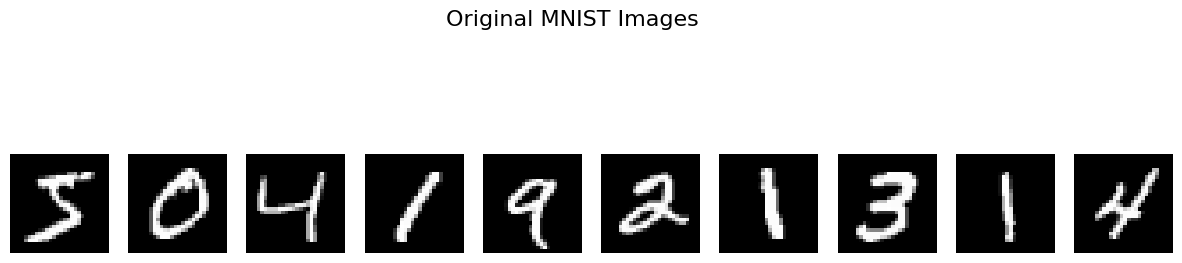

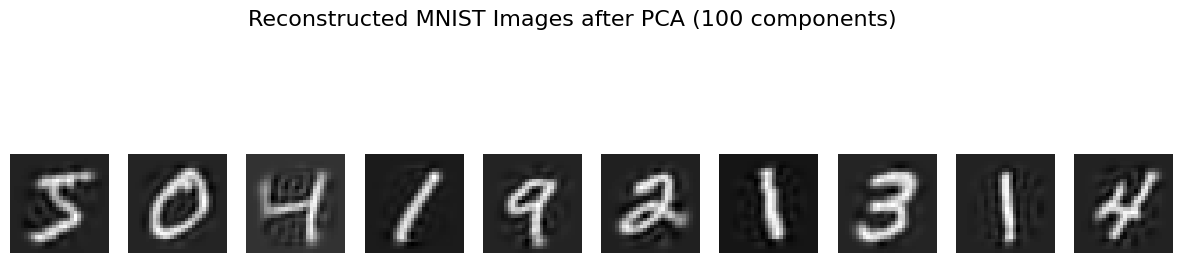

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist

# 1. Load full MNIST dataset
(X_train, y_train), (_, _) = mnist.load_data()

# 2. Preprocess: Flatten images to vectors (28x28 → 784)
X_train_flat = X_train.reshape(-1, 28*28) / 255.0  # Normalize pixel values to [0,1]

# 3. Show original images (first 10)
fig, axes = plt.subplots(1, 10, figsize=(15, 4))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i], cmap='gray')
    ax.axis('off')
fig.suptitle('Original MNIST Images', fontsize=16)
plt.show()

# 4. Apply PCA
n_components = 100  # Let's reduce from 784 to 100 dimensions
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_train_flat)
X_reconstructed = pca.inverse_transform(X_pca)

# 5. Show reconstructed images
fig, axes = plt.subplots(1, 10, figsize=(15, 4))
for i, ax in enumerate(axes):
    ax.imshow(X_reconstructed[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
fig.suptitle(f'Reconstructed MNIST Images after PCA ({n_components} components)', fontsize=16)
plt.show()
